In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
train = pd.read_csv(r"D:\Deep_Learning_code\LP-IV-datasets\CIFR\train.csv")

In [3]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [4]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values

In [5]:
x_train.shape

(50000, 3072)

In [6]:
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255

In [7]:
test = pd.read_csv(r"D:\Deep_Learning_code\LP-IV-datasets\CIFR\test.csv")

In [8]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

In [10]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
625/625 [==============================] - 75s 120ms/step - loss: 2.0743 - accuracy: 0.2164 - val_loss: 1.6714 - val_accuracy: 0.3928
Epoch 2/11
625/625 [==============================] - 69s 110ms/step - loss: 1.6644 - accuracy: 0.3866 - val_loss: 1.4133 - val_accuracy: 0.4804
Epoch 3/11
625/625 [==============================] - 63s 100ms/step - loss: 1.4507 - accuracy: 0.4780 - val_loss: 1.3930 - val_accuracy: 0.5224
Epoch 4/11
625/625 [==============================] - 62s 100ms/step - loss: 1.3184 - accuracy: 0.5292 - val_loss: 1.2033 - val_accuracy: 0.5865
Epoch 5/11
625/625 [==============================] - 64s 102ms/step - loss: 1.2087 - accuracy: 0.5715 - val_loss: 1.1766 - val_accuracy: 0.5896
Epoch 6/11
625/625 [==============================] - 79s 127ms/step - loss: 1.1114 - accuracy: 0.6085 - val_loss: 1.1724 - val_accuracy: 0.5875
Epoch 7/11
625/625 [==============================] - 101s 162ms/step - loss: 1.0294 - accuracy: 0.6349 - val_loss: 1.1756 - val_a

In [11]:
x_test = test.values

In [12]:
x_test = x_test.reshape((10000, 32, 32, 3)).astype('float32')/255

In [13]:
predictions = model.predict(x_test)

In [17]:
predictions

array([[6.64908513e-02, 2.81052981e-02, 4.70925868e-02, ...,
        1.20700393e-02, 6.11287840e-02, 1.46699110e-02],
       [1.53835695e-02, 3.82359438e-02, 2.53795675e-04, ...,
        3.31754291e-06, 7.61668146e-01, 1.83911428e-01],
       [5.46833873e-01, 1.77972689e-02, 3.79603542e-02, ...,
        1.01796528e-02, 1.98648229e-01, 7.48139992e-02],
       ...,
       [4.86066286e-03, 6.89121998e-06, 1.74144149e-01, ...,
        3.64365149e-03, 2.99264299e-04, 2.20813236e-05],
       [8.05569533e-03, 4.44433764e-02, 4.59502786e-02, ...,
        1.34459987e-01, 6.80791773e-03, 4.61605899e-02],
       [2.27515251e-04, 1.36249617e-03, 5.93087403e-04, ...,
        9.62667763e-01, 4.75063061e-05, 4.73211228e-04]], dtype=float32)

In [14]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

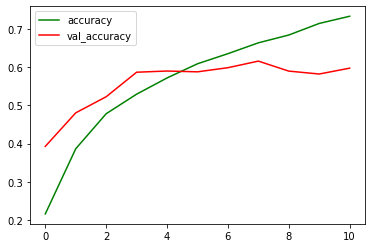

In [15]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

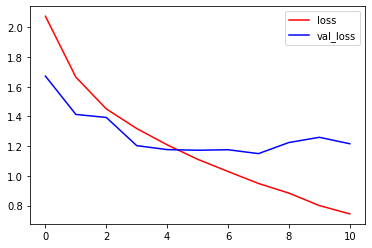

In [16]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()